In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Parameters for the system
alpha = 10       # Maximum production rate
n = 2            # Hill coefficient
gamma = 1        # Degradation rate
Kd = 1           # Dissociation constant
beta = 5         # Memory amplification factor
delta = 0.5      # Memory decay rate
L_max = 10       # Maximum light intensity
light_period = 20 # Time between light bursts
light_duration = 5 # Duration of light bursts

# Light stimulus function (square wave)
def light_stimulus(t):
    if (t % light_period) < light_duration:
        return L_max
    else:
        return 0

# Shape-memory repressilator ODEs
def repressilator_with_memory(t, y):
    A, B, C, M = y  # A, B, C are protein concentrations, M is the memory term
    
    # Light stimulus
    L = light_stimulus(t)
    
    # Memory effect
    dM_dt = beta * L - delta * M
    
    # Repressilator equations with light and memory
    dA_dt = alpha / (1 + (C / Kd)**n) + M - gamma * A
    dB_dt = alpha / (1 + (A / Kd)**n) - gamma * B
    dC_dt = alpha / (1 + (B / Kd)**n) - gamma * C
    
    return [dA_dt, dB_dt, dC_dt, dM_dt]



In [3]:
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Initial conditions for multiple trajectories
initial_conditions = [
    [1, 0, 0, 0],   # Default
    [5, 5, 5, 0],   # Mid-range
    [10, 1, 1, 0],  # Higher A
    [1, 10, 10, 0], # Higher B
    [7, 3, 1, 0]    # Mixed
]

In [4]:
# Solve ODEs for each initial condition
solutions = [solve_ivp(repressilator_with_memory, t_span, y0, t_eval=t_eval, method='RK45') for y0 in initial_conditions]

# Define nullclines
B_nullcline = np.linspace(0, 20, 500)  # Expanded range
A_nullcline = alpha / (1 + (B_nullcline / Kd)**n) / gamma  # dB/dt = 0
A_range = np.linspace(0, 20, 500)  # Expanded range
B_nullcline2 = alpha / (1 + (A_range / Kd)**n) / gamma  # dA/dt = 0

# Define a grid for the vector field in A-B phase space
A_vec = np.linspace(0, 20, 50)  # Expanded range for better coverage
B_vec = np.linspace(0, 20, 50)
A_grid, B_grid = np.meshgrid(A_vec, B_vec)

# Memory term (constant for simplicity, adjust as needed for time-dependence)
M_value = 0

# Compute dA/dt and dB/dt for the vector field
C_fixed = 5  # Fix C to a constant value for 2D representation
dA_dt = alpha / (1 + (C_fixed / Kd)**n) + M_value - gamma * A_grid
dB_dt = alpha / (1 + (A_grid / Kd)**n) - gamma * B_grid

# Enable non-blocking mode
plt.ion()


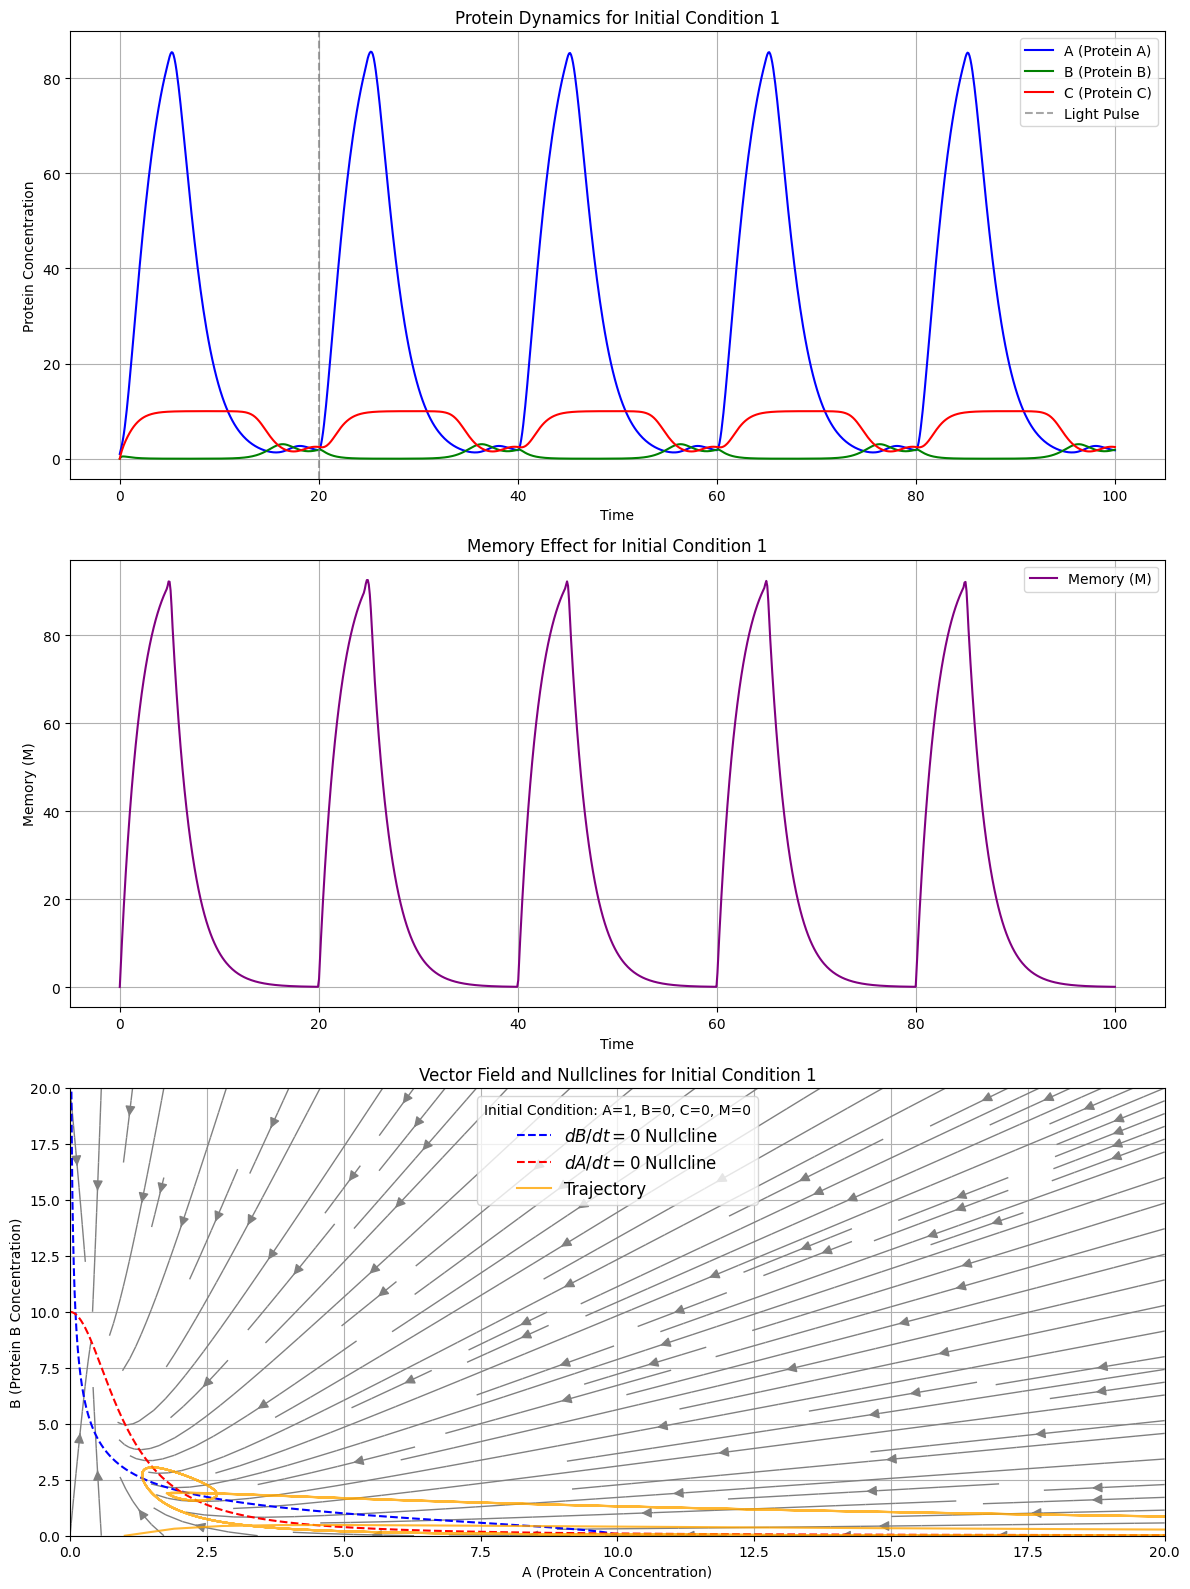

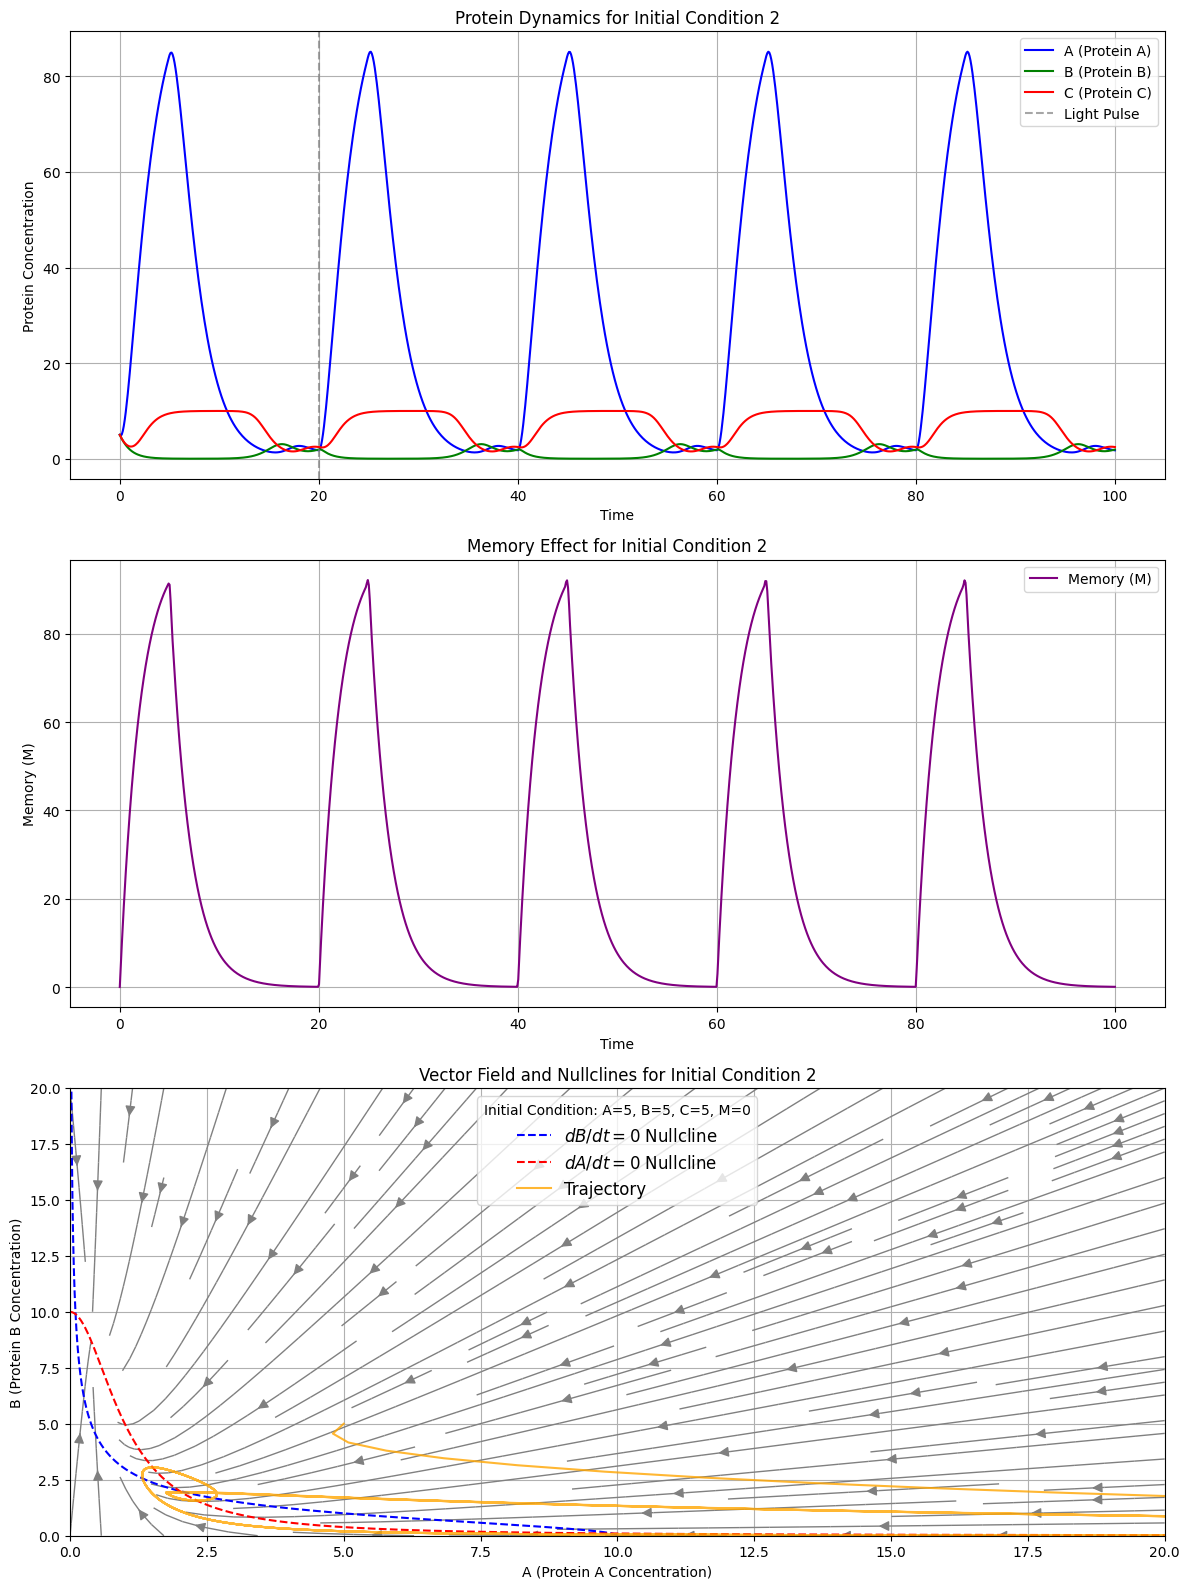

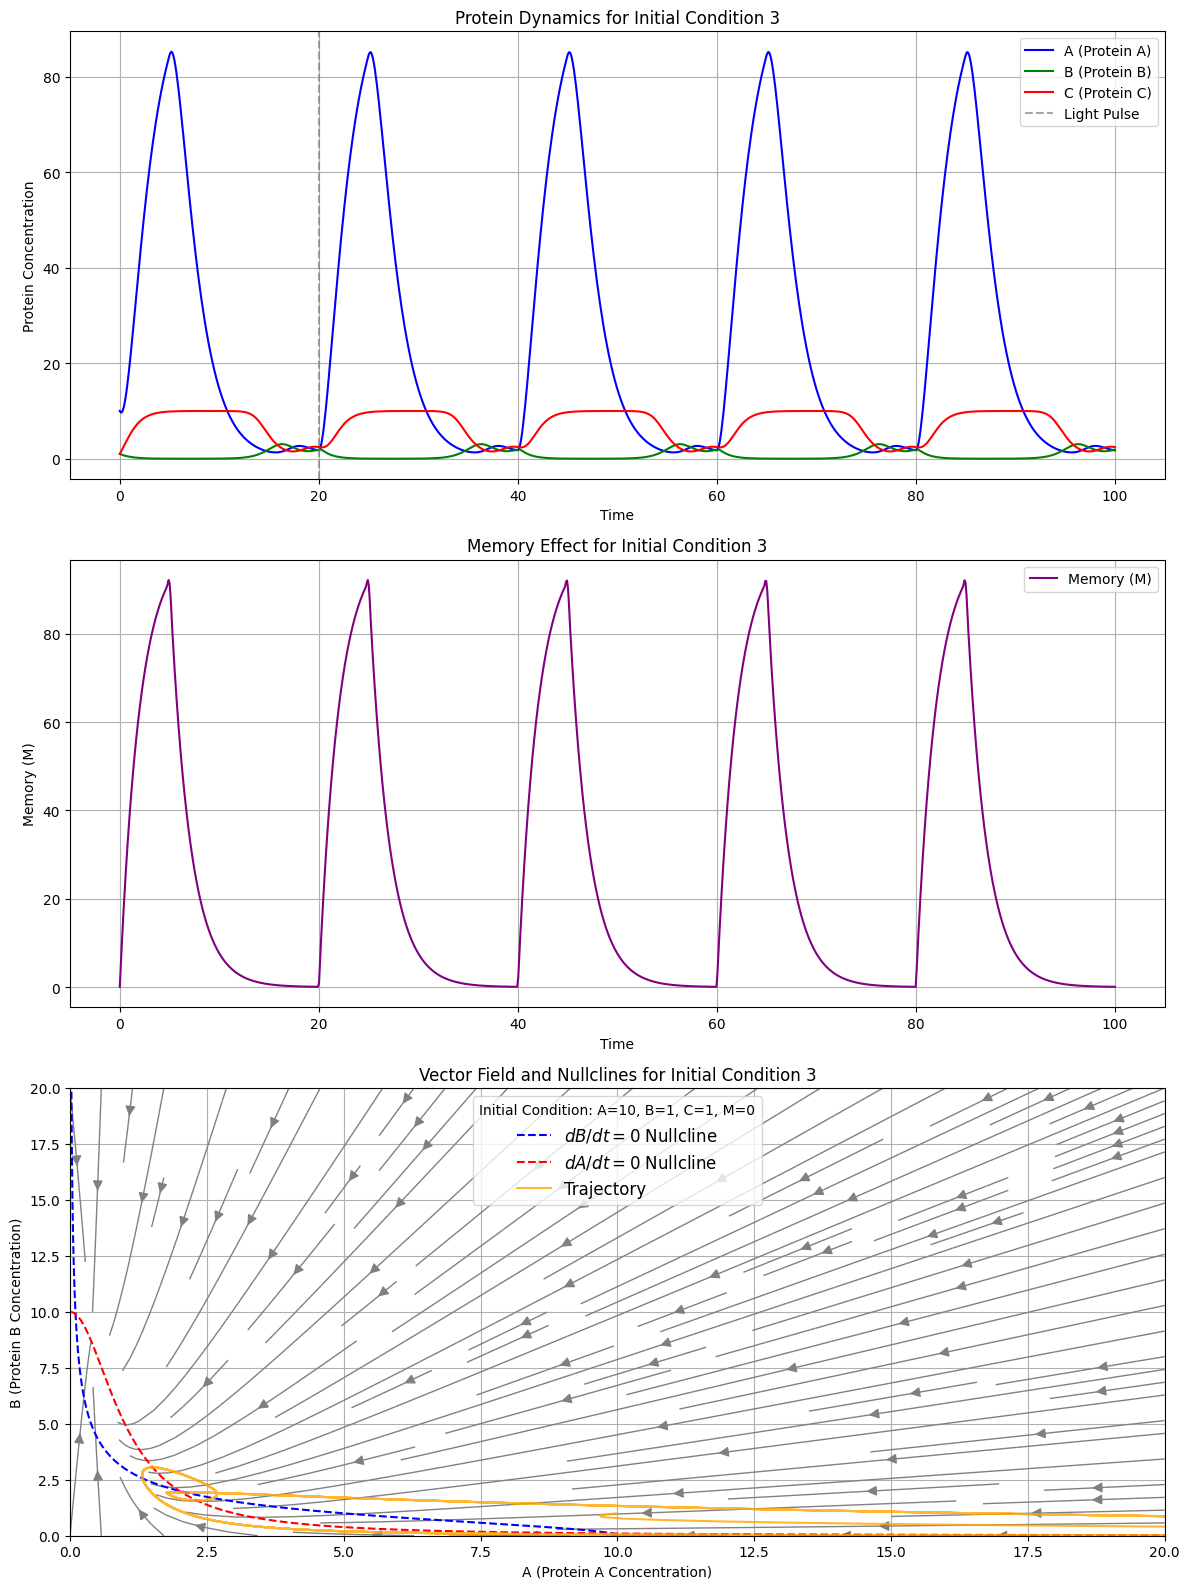

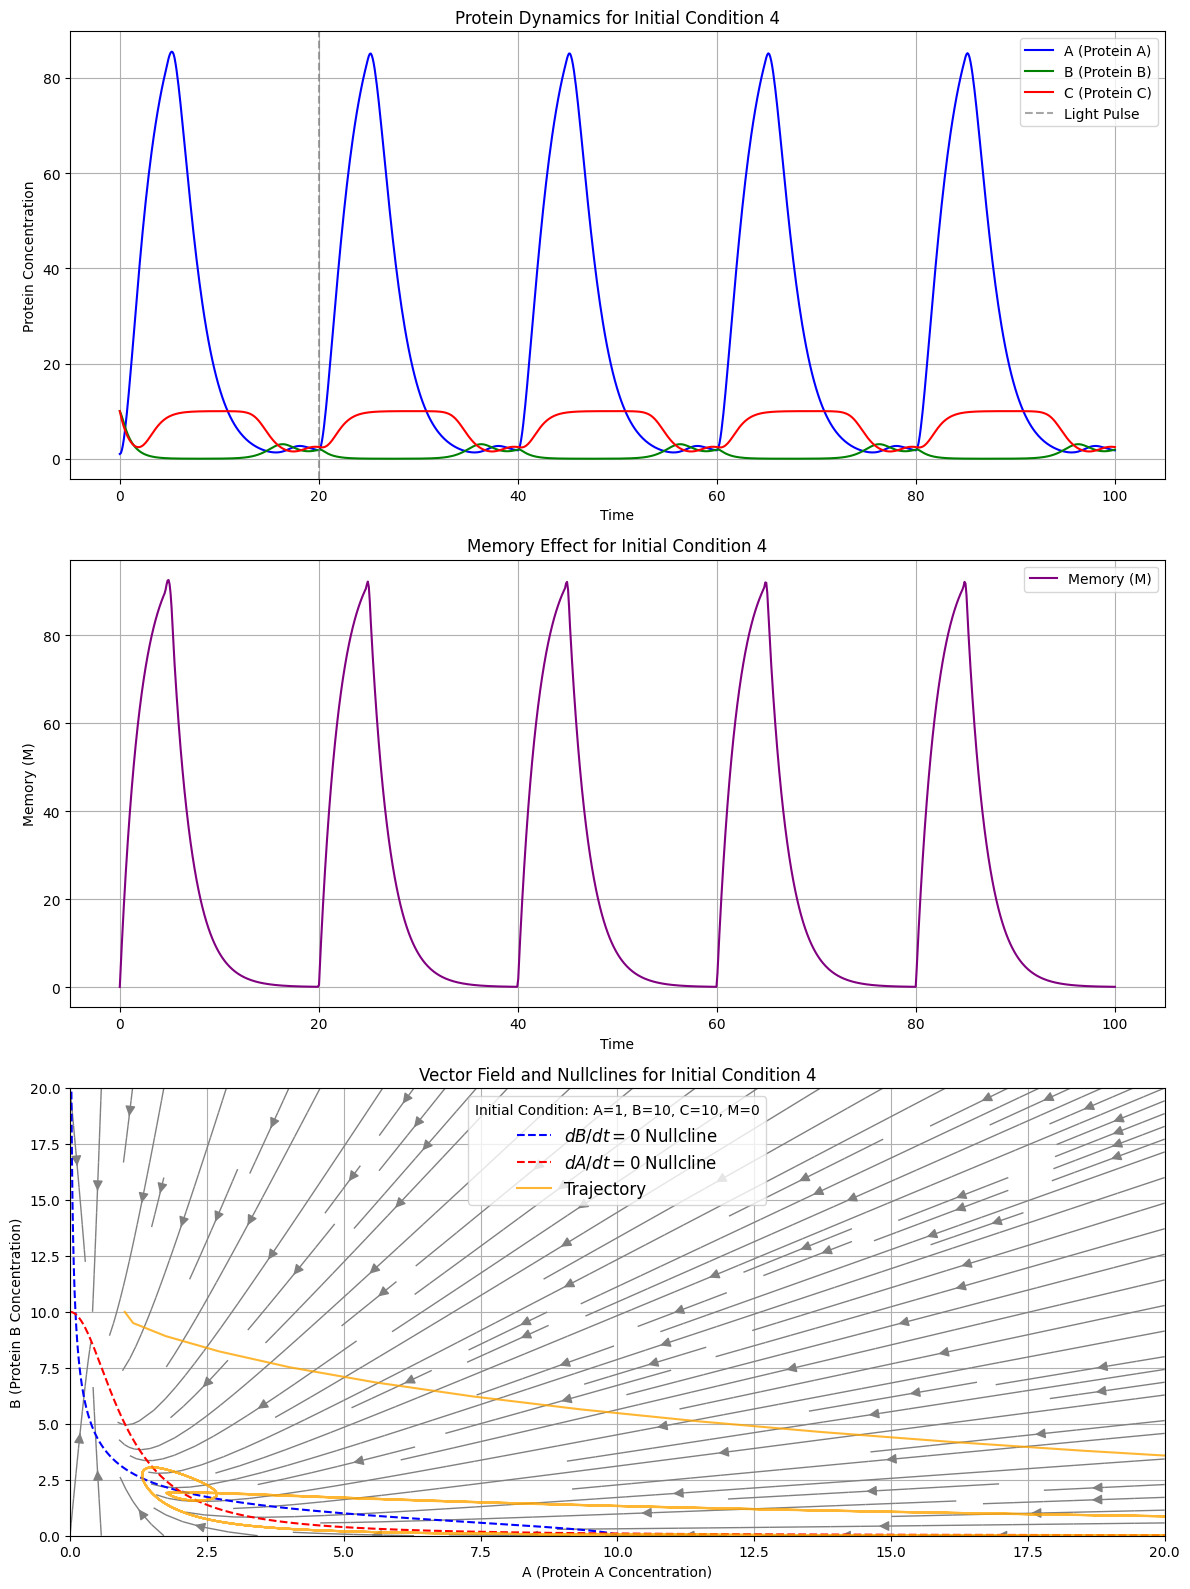

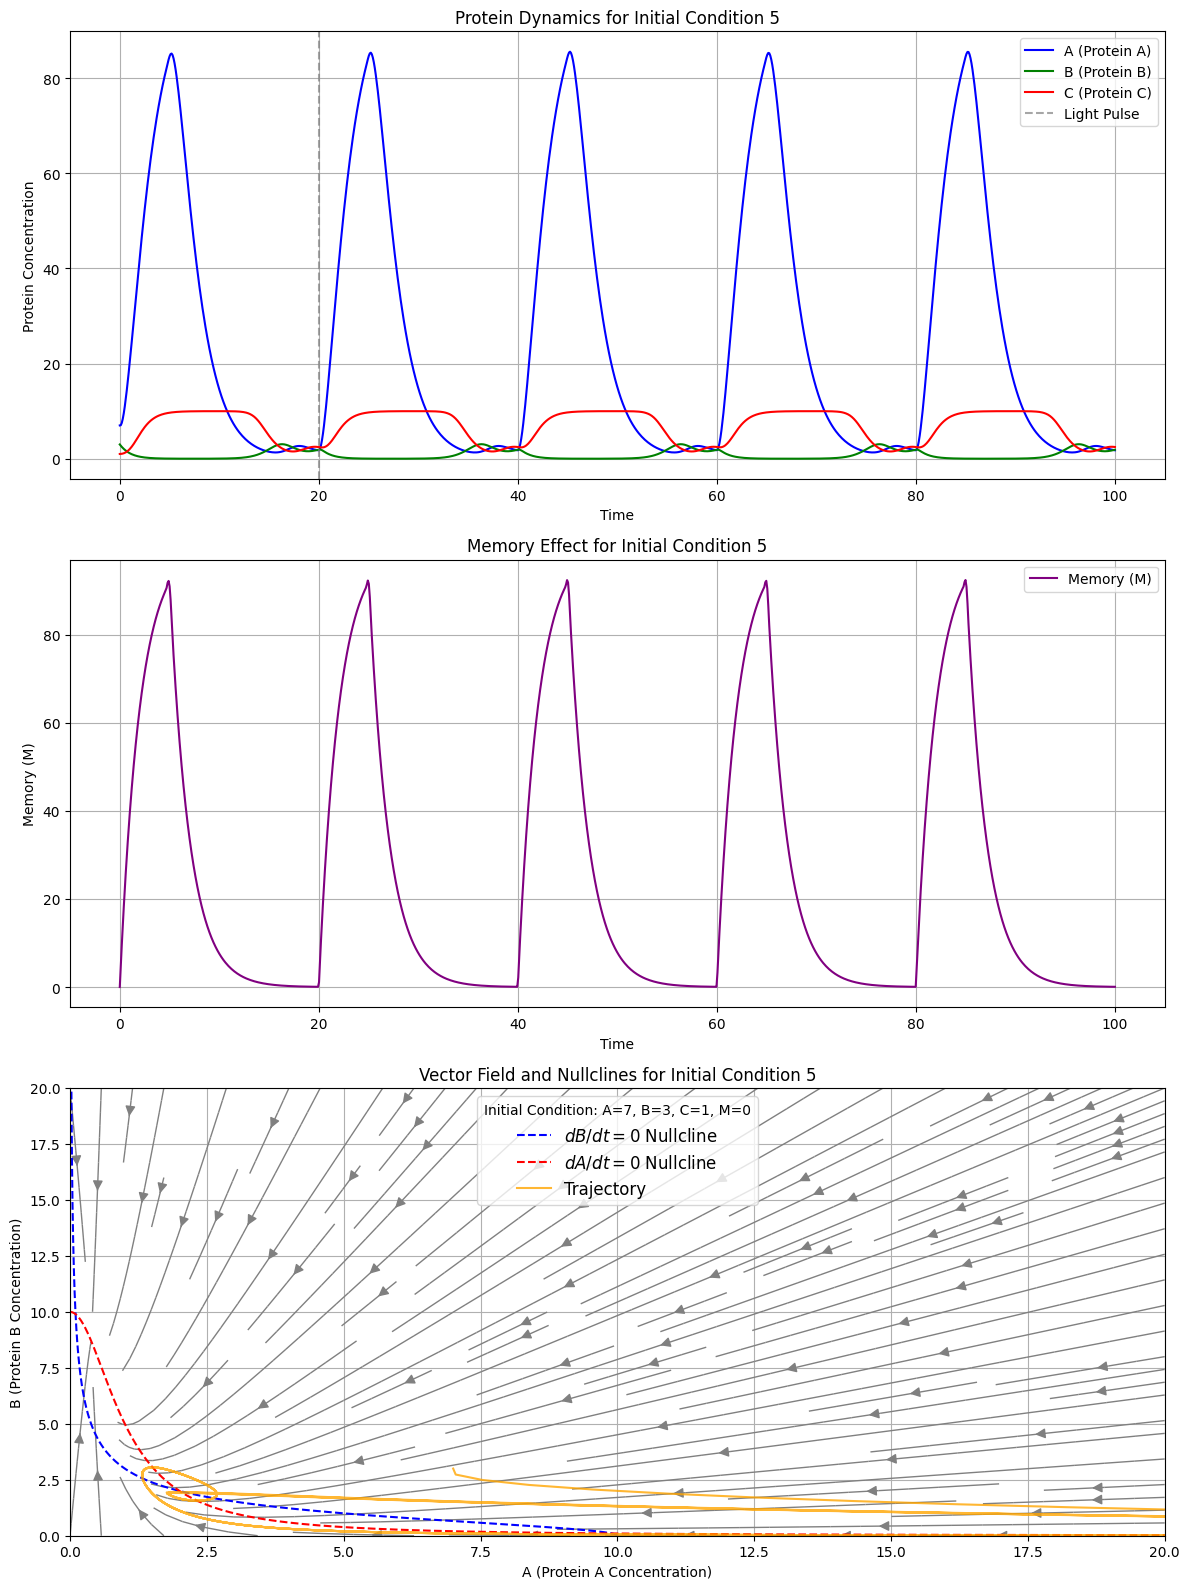

In [5]:
# Plot each trajectory as a separate figure
for idx, (sol, init_cond) in enumerate(zip(solutions, initial_conditions)):
    fig, ax = plt.subplots(3, 1, figsize=(12, 16))

    # Plot protein concentrations
    ax[0].plot(sol.t, sol.y[0], label=f'A (Protein A)', color='blue')
    ax[0].plot(sol.t, sol.y[1], label=f'B (Protein B)', color='green')
    ax[0].plot(sol.t, sol.y[2], label=f'C (Protein C)', color='red')
    ax[0].axvline(x=light_period, color='gray', linestyle='--', alpha=0.7, label='Light Pulse')
    ax[0].set_title(f"Protein Dynamics for Initial Condition {idx+1}")
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Protein Concentration")
    ax[0].legend()
    ax[0].grid()

    # Plot memory term
    ax[1].plot(sol.t, sol.y[3], label=f'Memory (M)', color='purple')
    ax[1].set_title(f"Memory Effect for Initial Condition {idx+1}")
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("Memory (M)")
    ax[1].legend()
    ax[1].grid()

    # Streamline vector field with nullclines
    ax[2].streamplot(A_grid, B_grid, dA_dt, dB_dt, color="gray", linewidth=1, density=1.2, arrowsize=1.5)
    ax[2].plot(A_nullcline, B_nullcline, label=r"$dB/dt = 0$ Nullcline", color='blue', linestyle='--')
    ax[2].plot(A_range, B_nullcline2, label=r"$dA/dt = 0$ Nullcline", color='red', linestyle='--')
    ax[2].plot(sol.y[0], sol.y[1], label="Trajectory", alpha=0.8, color='orange')
    ax[2].set_title(f"Vector Field and Nullclines for Initial Condition {idx+1}")
    ax[2].set_xlabel("A (Protein A Concentration)")
    ax[2].set_ylabel("B (Protein B Concentration)")
    ax[2].set_xlim(0, 20)  # Adjusted x-axis range
    ax[2].set_ylim(0, 20)  # Adjusted y-axis range
    ax[2].legend(fontsize=12, title=f"Initial Condition: A={init_cond[0]}, B={init_cond[1]}, C={init_cond[2]}, M={init_cond[3]}")
    ax[2].grid()

    # Adjust layout
    plt.tight_layout()

# Show all figures at once
plt.show(block=True)
